# Import Libreries and Data

In [214]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Read in the Data
df = pd.read_csv(r"C:\Users\nico_\OneDrive\Escritorio\DataScience\Python\Projects\Correlation in Python Project - Movies\movies.csv")

# Adjust the configuration of the plots to be created
matplotlib.rcParams['figure.figsize'] = (12, 8) 

# Show plot
plt.show()


In [23]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# First Cleaning Data

In [218]:
# Checking for NULL values

for col in df.columns:
    percent_of_missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_of_missing_data))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [220]:
# NULL values will be replcaed for demonstration purposes

# Replacing NULL values for categorical columns with mode (most frequent value)
categorical_cols = ['genre', 'director', 'writer', 'star', 'country', 'company']
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Define the most frequent value (mode)
    df[col] = df[col].fillna(mode_value)  # Reassign the column without inplace

# Replacing numeric columns with median value
numeric_cols = ['score', 'votes', 'budget', 'gross', 'runtime']
for col in numeric_cols:
    median_value = df[col].median()  # Define median value
    df[col] = df[col].fillna(median_value)  # Reassign the column without inplace

df['released'] = df['released'].fillna(df['year'].astype(str) + '-01-01')  # Assigning dates based on the year

df['rating'] = df['rating'].fillna('NR')  # Replacing with 'NR' = Not Rated

# This won't provide a true representation but will be usefull for this particular usecase


In [222]:
for col in df.columns:
    percent_of_missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_of_missing_data))

# All NULLS replaced

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [224]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [226]:
#Setting proper datatypes for columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [100]:
# Deleting Duplicates

df.drop_duplicates()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NR,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,NR,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NR,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,NR,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


# Exploring Data

In [228]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NR,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,NR,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [230]:
pd.set_option('display.max_rows', 20)
# change 20 to None to see all the columns.


# Correlations

In [107]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NR,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,NR,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NR,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,NR,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


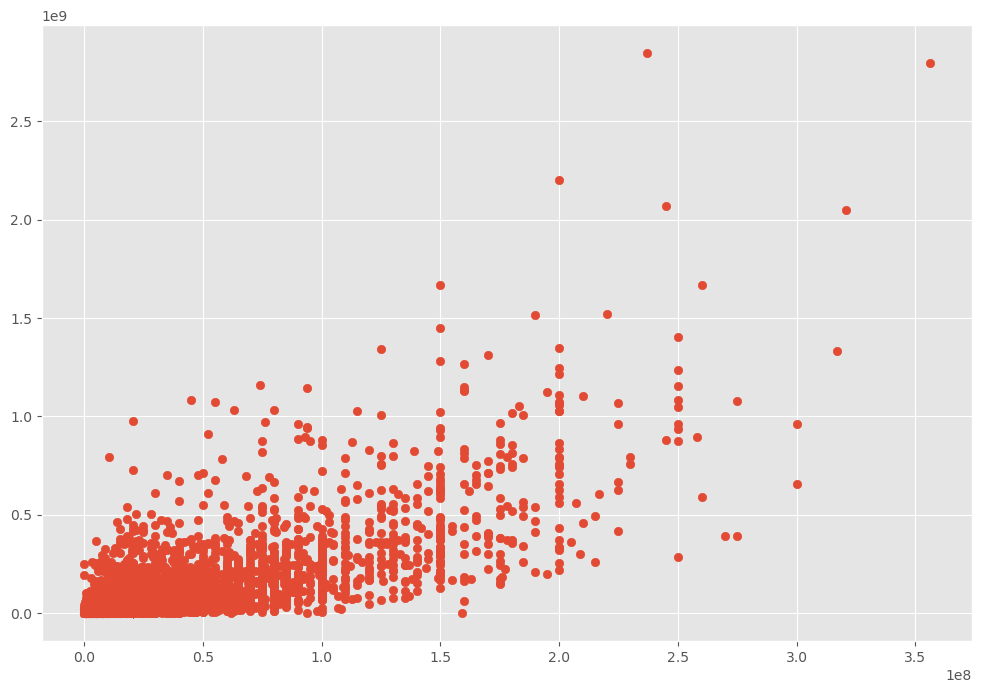

In [240]:
# Correlation 1: High Budget = High Correlation
# Building a Scatter plot with Budget VS Gross
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
plt.scatter(x=df['budget'], y=df['gross'])

In [242]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


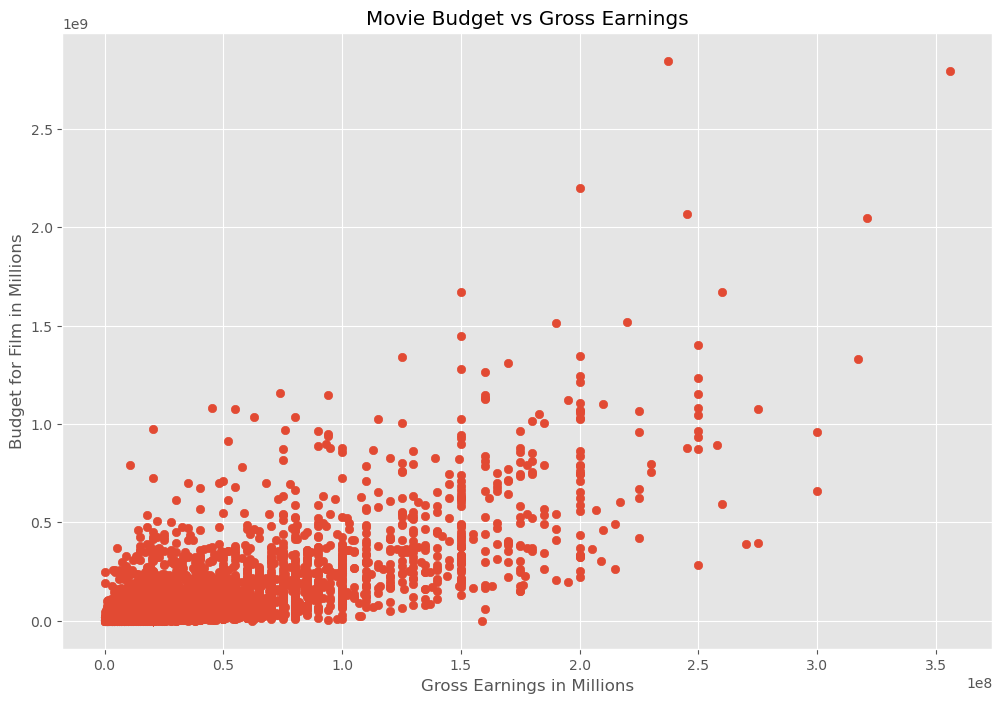

In [244]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Movie Budget vs Gross Earnings')
plt.xlabel('Gross Earnings in Millions')
plt.ylabel('Budget for Film in Millions')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

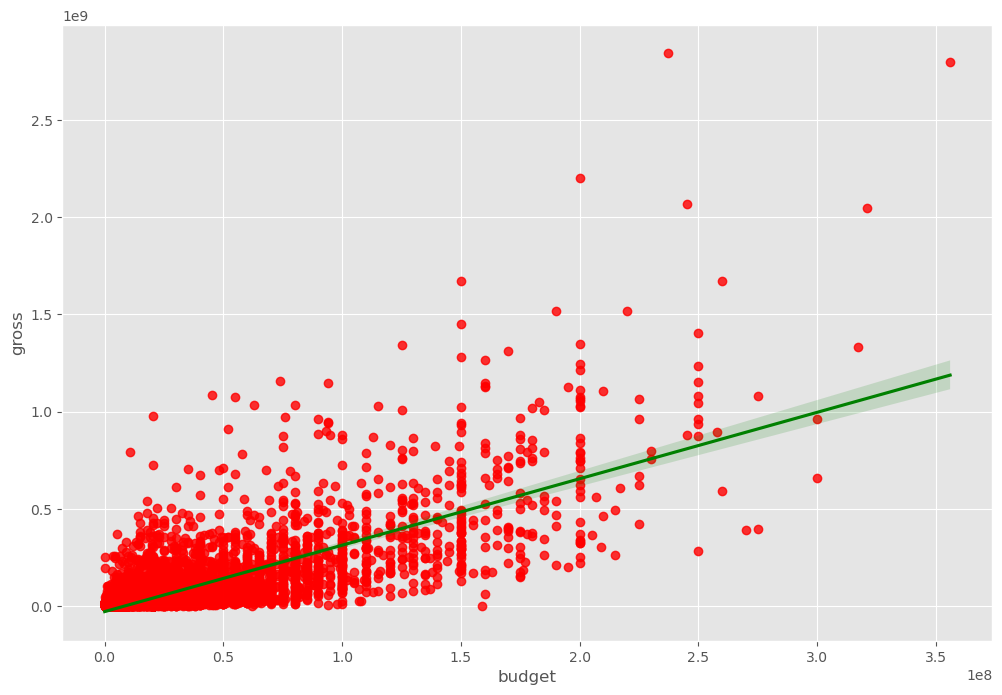

In [246]:
# Plot Budget vs Gross using Seaborn  -- (predictable correlation)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"green"})

In [248]:
# Filter only numeric feautres

numeric_df = df.select_dtypes(include=['float64', 'int64'])

spearman_correlation = numeric_df.corr(method = 'spearman')
kendall_correlation = numeric_df.corr(method = 'kendall')
pearson_correlation = numeric_df.corr(method = 'pearson')

print('Pearson Correlation')
print(pearson_correlation)
print('Kendall Correlation')
print(kendall_correlation)
print('Spearman Correlation') 
print(spearman_correlation)


Pearson Correlation
             year     score     votes    budget     gross   runtime
year     1.000000  0.098013  0.222573  0.291690  0.259504  0.120662
score    0.098013  1.000000  0.409157  0.061931  0.185563  0.399407
votes    0.222573  0.409157  1.000000  0.460968  0.632120  0.309151
budget   0.291690  0.061931  0.460968  1.000000  0.745881  0.273371
gross    0.259504  0.185563  0.632120  0.745881  1.000000  0.244380
runtime  0.120662  0.399407  0.309151  0.273371  0.244380  1.000000
Kendall Correlation
             year     score     votes    budget     gross   runtime
year     1.000000  0.067628  0.331208  0.185818  0.196205  0.097157
score    0.067628  1.000000  0.300087 -0.001776  0.084530  0.283447
votes    0.331208  0.300087  1.000000  0.268941  0.530052  0.198120
budget   0.185818 -0.001776  0.268941  1.000000  0.376115  0.192008
gross    0.196205  0.084530  0.530052  0.376115  1.000000  0.165143
runtime  0.097157  0.283447  0.198120  0.192008  0.165143  1.000000
Spearman

In [250]:
numeric_df.corr()

#Default method is Pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


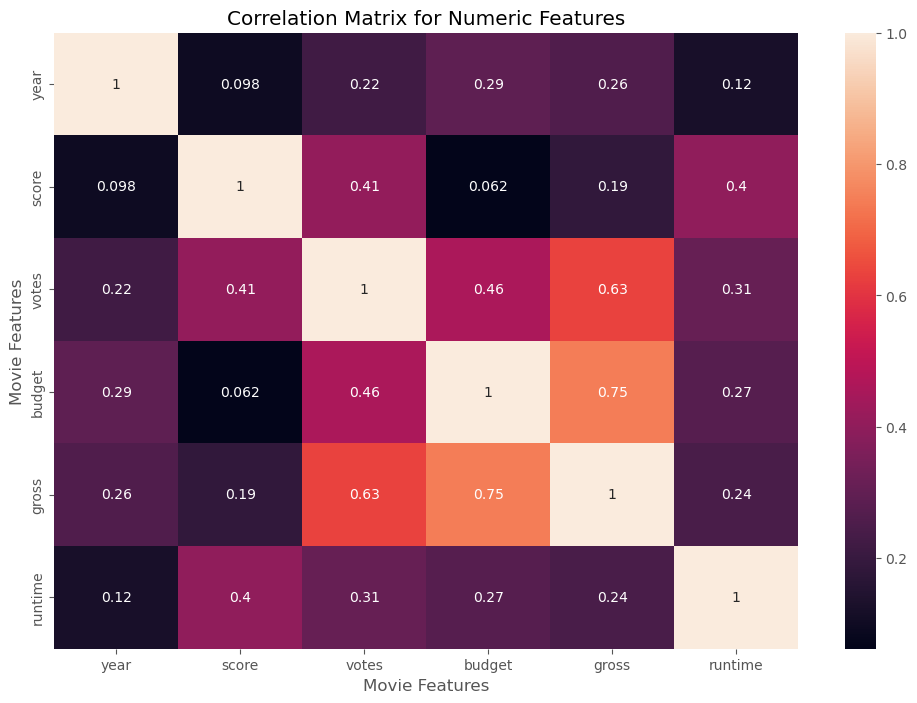

In [252]:
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [258]:
# Correlation with not numeric values, creating numeric representations

df_numeric_represent = df.copy()

for col_name in df_numeric_represent.columns:
    if(df_numeric_represent[col_name].dtype == 'object'):
        df_numeric_represent[col_name] = df_numeric_represent[col_name].astype('category')
        df_numeric_represent[col_name] = df_numeric_represent[col_name].cat.codes

df_numeric_represent.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,6,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,6,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,6,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


In [256]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NR,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0
2417,Madadayo,NR,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


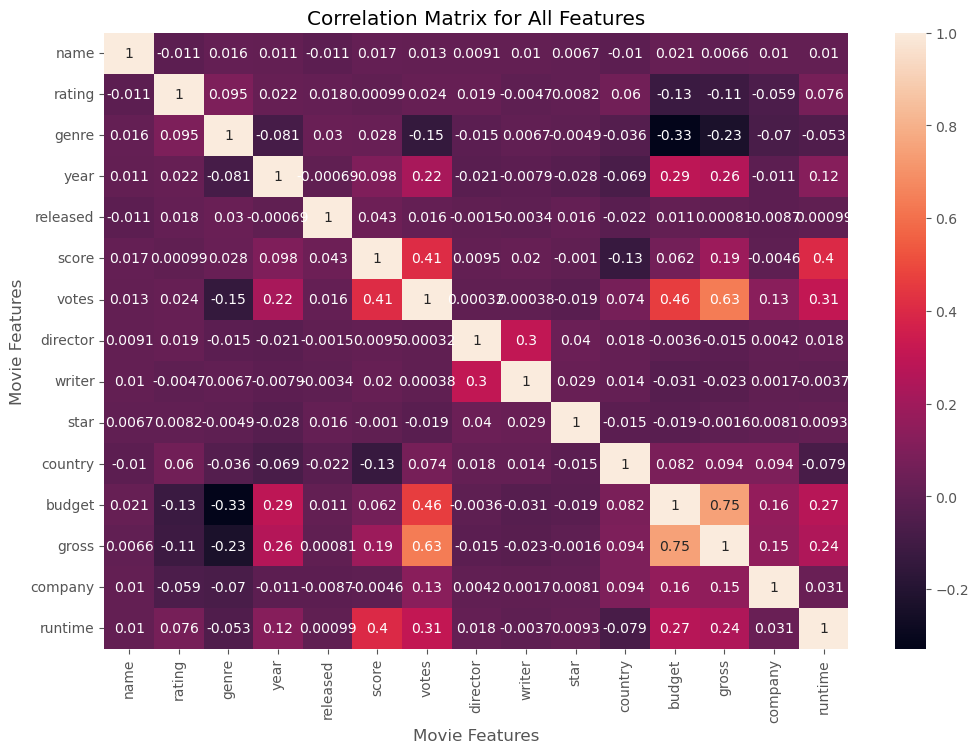

In [262]:
correlation_matrix2 = df_numeric_represent.corr()

sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [264]:
df_numeric_represent.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011237,0.016355,0.011453,-0.011309,0.017105,0.013056,0.009079,0.010018,0.006749,-0.010425,0.020921,0.006601,0.010369,0.010335
rating,-0.011237,1.000000,0.095126,0.022121,0.017525,0.000986,0.024006,0.019494,-0.004677,0.008246,0.059879,-0.125418,-0.112302,-0.058988,0.075547
genre,0.016355,0.095126,1.000000,-0.081261,0.029822,0.027965,-0.145291,-0.015258,0.006746,-0.004856,-0.035896,-0.328484,-0.233385,-0.070013,-0.052719
year,0.011453,0.022121,-0.081261,1.000000,-0.000692,0.098013,0.222573,-0.020795,-0.007901,-0.027745,-0.069423,0.291690,0.259504,-0.011438,0.120662
released,-0.011309,0.017525,0.029822,-0.000692,1.000000,0.042823,0.015960,-0.001478,-0.003357,0.015537,-0.022142,0.011120,0.000806,-0.008735,0.000990
score,0.017105,0.000986,0.027965,0.098013,0.042823,1.000000,0.409157,0.009540,0.019745,-0.001006,-0.134557,0.061931,0.185563,-0.004570,0.399407
votes,0.013056,0.024006,-0.145291,0.222573,0.015960,0.409157,1.000000,0.000316,0.000379,-0.019371,0.073522,0.460968,0.632120,0.130562,0.309151
director,0.009079,0.019494,-0.015258,-0.020795,-0.001478,0.009540,0.000316,1.000000,0.299512,0.039715,0.017926,-0.003584,-0.014758,0.004250,0.017611
writer,0.010018,-0.004677,0.006746,-0.007901,-0.003357,0.019745,0.000379,0.299512,1.000000,0.028745,0.014409,-0.031050,-0.023028,0.001665,-0.003715
star,0.006749,0.008246,-0.004856,-0.027745,0.015537,-0.001006,-0.019371,0.039715,0.028745,1.000000,-0.014749,-0.018814,-0.001640,0.008072,0.009253


In [270]:
correlation_matrix3 = df_numeric_represent.corr()

correlation_pairs = correlation_matrix3.unstack()

correlation_pairs

name      name        1.000000
          rating     -0.011237
          genre       0.016355
          year        0.011453
          released   -0.011309
          score       0.017105
          votes       0.013056
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020921
          gross       0.006601
          company     0.010369
          runtime     0.010335
rating    name       -0.011237
          rating      1.000000
          genre       0.095126
          year        0.022121
          released    0.017525
          score       0.000986
          votes       0.024006
          director    0.019494
          writer     -0.004677
          star        0.008246
          country     0.059879
          budget     -0.125418
          gross      -0.112302
          company    -0.058988
          runtime     0.075547
genre     name        0.016355
          rating      0.095126
        

In [274]:
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget    genre      -0.328484
genre     budget     -0.328484
gross     genre      -0.233385
genre     gross      -0.233385
votes     genre      -0.145291
genre     votes      -0.145291
country   score      -0.134557
score     country    -0.134557
rating    budget     -0.125418
budget    rating     -0.125418
gross     rating     -0.112302
rating    gross      -0.112302
genre     year       -0.081261
year      genre      -0.081261
runtime   country    -0.079305
country   runtime    -0.079305
company   genre      -0.070013
genre     company    -0.070013
year      country    -0.069423
country   year       -0.069423
company   rating     -0.058988
rating    company    -0.058988
runtime   genre      -0.052719
genre     runtime    -0.052719
          country    -0.035896
country   genre      -0.035896
writer    budget     -0.031050
budget    writer     -0.031050
star      year       -0.027745
year      star       -0.027745
writer    gross      -0.023028
gross     writer     -0.023028
country 

In [276]:
high_correlation = sorted_pairs[(sorted_pairs > 0.5)]
high_correlation

gross     votes       0.632120
votes     gross       0.632120
gross     budget      0.745881
budget    gross       0.745881
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budget have the Highest Correlation to Gross Earnings